In [1]:
import pandas as pd
import numpy as np
import malariagen_data
import malariagen_data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ag3 = malariagen_data.Ag3()

In [3]:
samples = ag3.sample_metadata()
samples

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,VBS00256-4651STDY7017184,GP97,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
1,VBS00257-4651STDY7017185,GP98,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
2,VBS00259-4651STDY7017186,GP100,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
3,VBS00262-4651STDY7017187,GP103,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
4,VBS00277-4651STDY7017189,GP118,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22600,SAMN15222632,D342,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
22601,SAMN15222633,D343,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
22602,SAMN15222634,D346,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
22603,SAMN15222635,D347,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016


In [4]:
gambiae_samples = samples.query("taxon in ['gambiae', 'coluzzii', 'arabiensis']") 

In [5]:
N_SAMPLES = 500
N_SNPS = 200

In [6]:
sub_samples = gambiae_samples.sample(N_SAMPLES, random_state=1)
sub_sample_ids = sub_samples['sample_id'].tolist()

In [7]:
region = "2R:1000000-1002000"  # Tiny window; adjust as needed
callset = ag3.snp_calls(region=region)

In [8]:
all_sample_ids = callset['sample_id'].values.astype(str)
idx = [i for i, s in enumerate(all_sample_ids) if s in sub_sample_ids]

In [9]:
gt = callset['call_genotype'].values[:, idx, :]
gt_sum = gt.sum(axis=2)  # shape: (variants, selected_samples)
sample_ids = np.array(sub_sample_ids)
variant_ids = callset['variant_position'].values.astype(str)[:N_SNPS]

In [10]:
gt

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=int8)

In [11]:
gt_sum = gt.sum(axis=2) 

In [12]:
gt_sum = gt_sum[:N_SNPS, :]
variant_ids = variant_ids[:N_SNPS]

In [13]:
df_gt = pd.DataFrame(gt_sum.T, columns=variant_ids, index=sub_sample_ids)

species_map = samples.set_index('sample_id')['taxon'].to_dict()
df_gt['taxon'] = df_gt.index.map(species_map)

In [14]:
X = df_gt.drop(columns=['taxon'])
y = df_gt['taxon']

In [15]:
X = X.replace(-2, np.nan)  # Malariagen uses -2 for missing
X = X.loc[:, X.isna().mean() <= 0.05]
X = X.loc[X.isna().mean(axis=1) <= 0.05, :]
y = y.loc[X.index]

In [16]:
imp = SimpleImputer(strategy="most_frequent")
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns, index=X.index)

In [17]:
allele_freqs = X_imputed.sum(axis=0) / (2 * X_imputed.shape[0])
maf = np.minimum(allele_freqs, 1 - allele_freqs)
X_maf = X_imputed.loc[:, maf > 0.01]

In [18]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_maf), columns=X_maf.columns, index=X_maf.index)


In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_scaled.index)
pca_df['species'] = y


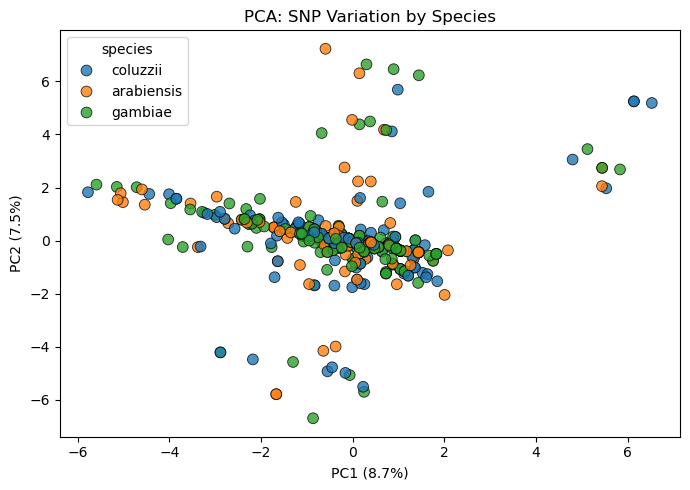

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', alpha=0.8, s=60, edgecolor='k')
plt.title('PCA: SNP Variation by Species')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, perplexity=25, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'], index=X_scaled.index)
tsne_df['taxon'] = y

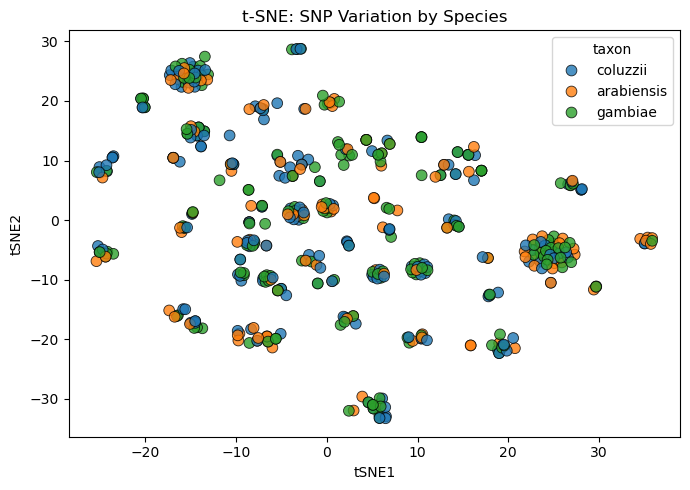

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='taxon', alpha=0.8, s=60, edgecolor='k')
plt.title('t-SNE: SNP Variation by Species')
plt.tight_layout()
plt.show()